# An Economic Model of Intraday Sleep Choice

Consider a household that makes a time-allocation decision every hour during the day.  There are three possible states of activity.

1) Working, the individual earns income which is added to savings, but does no consumption and generates no consumption utility; indeed, there may be disutility from working.  The individual's stock of sleep depreciates during this activity.  Wages earned depend on the stock of sleep at the time work occurs.

2) Playing, the individual earns no income, but consumes and draws down savings.  There is positive utility from playing and the individual optimally chooses the level of goods consumption during this activity.  Utility generated depends on the stock of sleep at the time.  This stock also depreciates during play.

3) Sleeping, the individual earns nothing and generates no utility.  However, the stock of sleep replenished during sleep.

In addition, there is a circadian cycle which governs the effectiveness of sleep and wakefulness at different times of the day.

Denote savings at time $t$ as $B_t$ and the stock of sleep as $Z_t$.  The current activity is denoted with indicator variable, $A_t$ which take on a value of 0 if working, 1 if playing, or 2 if sleeping.  Consumption when playing is denoted $C_t$.  The circadian cycle is denoted $y_t$.

This cycle is described by a sine wave with a time-varying vertical shifter, $\psi(Z_t)$.
$$ y_t = -\sin([t+b]\tfrac{\pi}{S}) + \psi(Z_t) $$
where $S$ is the number of periods in a day.

The household's problem is given by:
$$ V(B_t, Z_t, y_t) = \max_{A_t, C_t} U(Z_t, A_t, C_t, y_t) + \beta V(B_{t+1}, Z_{t+1}; y_{t+1}) $$

The accumulation of savings and sleep stock are governed by the following:
$$ B_{t+1} = \left\{ \begin{matrix} B_t + \bar w \phi(Z_t) & \text{if } A_t = 0 \\ B_t - C_t & \text{if } A_t = 1 \\ B_t & \text{otherwise} \end{matrix} \right. $$
Note that we will impose a non-negativeity constraint on $B_{t+1}$, so that $C_t \le B_t$.

$$ Z_{t+1} = \left\{ \begin{matrix} Z_t(1-\delta_W) & \text{if } A_t = 0 \\ Z_t(1-\delta_P) & \text{if } A_t = 1 \\ Z_t + \tfrac{1}{S} & \text{otherwise} \end{matrix} \right. $$

The utility function is:
$$ U^C(Z_t, A_t, C_t) = \left\{ \begin{matrix} \phi(Z_t) C_t^\gamma & \text{if } A_t = 1 \\ 0 & \text{otherwise} \end{matrix} \right. $$

$$ U^y(Z_t, A_t, y_t) = \left\{ \begin{matrix} y_t & \text{if } A_t = 2 \\ -y_t & \text{otherwise} \end{matrix} \right. $$

$$ U(Z_t, A_t, C_t, y_t) = U^C(Z_t, A_t, C_t) + \chi_S U^y(Z_t, A_t, y_t) $$
note that $[2(1-W_t-P_t) - 1]$ equals one when working or playing, and minus one when sleeping.

The effectivness function is:
$$ \phi(Z_t) = h Z_t^\eta $$

The circadian shifter function is:
$$ \psi(Z_t) = \tfrac{2}{\pi}\tan^{-1}(fZ_t + g) $$

## A Definitions Function

First, let us define a function that returns $U_t$, $B_{t+1}$ and $Z_{t+1}$ given the current state, $\{B_t, Z_t, y_t\}$

In [3]:
def moddefs(B, Z, y, A, C, *mparams):
    '''
    B is the stock of savings now
    Z is the stock of sleep capital now
    y is the value of the circadian cycle now
    A is an indicator for working, playing or sleeping now
    P is a binary indicating playing now
    C is consumption now if P=1
    
    UC is utility from consumption >= 0
    Uy is utility from following the circadian cycle
    Bp is savings next period
    Zp is sleep stock next period
    U is total utility
    '''
    # effective labor as a function of sleep stock, Phi
    e = h*Z**eta
    # upward shift in circadian cycle as function of sleep stock, Psi
    d = 2*np.arctan(f*Z + g)/np.pi
    # if working (A=0)
    if (A == 0):
        UC = 0.
        Uy = y*d
        Bp = B + e*wbar
        Zp = Z*(1-delW)
    # if playing (A=1)
    elif (A == 1):
        # consumption greater than savings is not allowed
        if C > B:
            UC = -1.E+99
            Bp = 0.
        else:
            UC = e*C**gamma
            Bp = B - C
        Uy = y*d
        Zp = Z*(1-delP)
    else:
        UC = 0.
        Uy = -y*d
        Bp = B
        Zp = Z + 1/S
    # total utility
    U = UC + chiS*Uy
    return U, Bp, Zp


## The Main Program

First, we need to import `numpy` and the plotting from `matplotlib`.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Next, we declare the value of the model parameters and construct the circadian cycle.

In [5]:
# define parameters
S = 24        # number of periods per day
eta = .5      # curvature of phi(Z) functuion
h = 1.        # scaling factor for phi(Z) function
wbar = 1.     # constant wage
f = .5        # scaling factor for d(Z) function
g = .1        # additive factor for d(Z) function
b = 4.        # phase shifter for circadian cycle
delW = .2     # depreciation rate per period for sleep capital when working
delP = .1     # depreciation rate per period for sleep capital when playng
gamma = .75   # curvature of consumption utility, CES
chiS = 5.     # utility weight on sleep timing
beta = .9     # subjective discount factor per period
# set up sine way for circadian cycle
yvect = np.linspace(0., 2*np.pi, num = S+1)
yvect = -np.sin(yvect + .5*b/np.pi)
# save to mparams list
mparams = (S, eta, h, wbar, f, g, b, delW, delP, gamma, chiS, beta, yvect)

We plot the circadian cycle to see when the individual is likely to sleep and be awake.

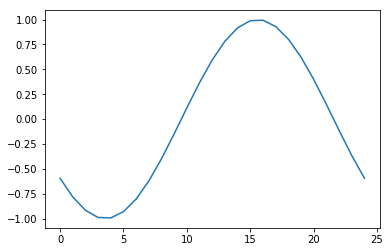

In [6]:
# plot circadian cycle
plt.plot(yvect)
plt.show()

We then set up grids for $B$, $Z$ and $C$.  No grid is needed for $A$ since the values will correspond exaxctly to the index, $A_t \in \{0, 1, 2\}$.

In [7]:
# set up other grids
nB = 11
nZ = 11
nC = 11
Bvect = np.linspace(0., 5., num = nB)
Zvect = np.linspace(0., 5., num = nZ)
Cvect = np.linspace(0., 5., num = nC)

Nest, we initialize the value function, $V$, the policy functions, $\Phi_B, \Phi_Z$ and the jump functions, $\Lambda_A, \Lambda_C$.

We also set the maximum number of allowable iterations, and the criterion by which we determine if the value function has converged.

Then we initialize the starting distance to an number greater than the convergence criterion and start the iteration counter at zero.

In [8]:
# set up value function, policy functions and jump functions
V = np.zeros((nB,nZ,S))
PhiB = np.zeros((nB,nZ,S))
PhiZ = np.zeros((nB,nZ,S))
LamA = np.zeros((nB,nZ,S))
LamC = np.zeros((nB,nZ,S))
Vnew = np.zeros((nB,nZ,S))
# set iteration parameters
maxiters = 500.
ccrit = 1.E-6
# set starting values
dist = 1.
iters = 0

It is useful in the value-function iteration to round the values of $B_{t+1}$ and $Z_{t+1}$ to the closest values in the grids we have set up.  We do this by using the simple function below.  Here `array` will be either `Bvect` or `Zvect`, and `value` will be either $B_{t+1}$ or $Z_{t+1}$.

In [9]:
def nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

We use value-function iteration by searching over the values of $A_t$ and $C_t$ that maximize value - $U(Z_t, A_t, C_t, y_t) + \beta V(B_{t+1}, Z_{t+1}; y_{t+1})$ for each possible state or permutations of $B_t$ and $Z_t$.  Note the our `moddefs` function will give us $U(Z_t, A_t, C_t, y_t)$, $B_{t+1}$ and $Z_{t+1}$.

For each permutation of $B_t$ and $Z_t$ we initially set the maximum observed value to s large negative number.  We then loop over all permutations of $A_t$ and $C_t$ and find $V_t' = U_t + \beta V_{t+1}$, $B_{t+1}$ and $Z_{t+1}$.  If the value of $V_t'$ is greater that the largest value observed so far, we replace that largest value with $V_t'$ and write the values of $B_{t+1}$, $Z_{t+1}$, $A_t$, and $C_t$ to the appropriate parts of the policy and jump arrays.

One we have finished this for all values of $B_t$ and $Z_t$, we calculate the distance measure between $V$ and $V'$.  We choose the maximum absolute deviation as our measure of distance.  If this distance is less than the convergence criterion we will finish.  If not we replace $V$ with $V'$, reset $V'$ to zero and run another iteration,

In [10]:
# find value function, policy functions and jump functions
while (dist > ccrit) and (iters < maxiters):
    iters = iters + 1
    for iy in range(0, S):
        for iB in range(0, nB):
            for iZ in range(0, nZ):
                maxval = -1.E+98
                for iA in range(0, 3):
                    for iC in range(0, nC):
                        # find utility, next period's savings and sleep stock
                        U, Bp, Zp = moddefs(Bvect[iB], Zvect[iZ], yvect[iy], \
                            iA, Cvect[iC], *mparams)
                        # find closest index for Bp and Zp
                        iBp, temp = nearest(Bvect, Bp)
                        iZp, temp = nearest(Zvect, Zp)
                        # next period's value for the circadian cycle
                        if iy == S-1:
                            iyp = 0
                        else:
                            iyp = iy + 1
                        # find new value
                        val = U + beta*V[iBp, iZp, iyp]
                        # if this is greater than previous max, update
                        if val > maxval:
                            maxval = val
                            Vnew[iB, iZ, iy] = val
                            LamA[iB, iZ, iy] = iA
                            LamC[iB, iZ, iy] = Cvect[iC]
                            PhiB[iB, iZ, iy] = Bvect[iBp]
                            PhiZ[iB, iZ, iy] = Zvect[iZp]
    # distance measure is maximum absolute deviation
    dist = np.max(np.abs(V - Vnew))
    # replce old value function
    V = 1.*Vnew
    Vnew = 0.*Vnew
    # display progress
    print(iters, dist )            

1 11.2835496273
2 6.23347240024
3 4.67012449856
4 3.86215651788
5 2.631815644
6 2.30428168695
7 2.06727723043
8 1.86054950739
9 1.67449455665
10 1.50704510098
11 1.35634059088
12 1.2207065318
13 1.09863587862
14 0.988772290755
15 0.889895061679
16 0.800905555511
17 0.72081499996
18 0.616868233987
19 0.536494346462
20 0.482844911816
21 0.36914715094
22 0.30940909901
23 0.257442280044
24 0.220964612311
25 0.187759926024
26 0.163098316992
27 0.146788485293
28 0.132109636764
29 0.118898673087
30 0.107008805779
31 0.0963079252008
32 0.0866771326807
33 0.0780094194127
34 0.0702084774714
35 0.0631876297243
36 0.0568688667518
37 0.0511819800766
38 0.046063782069
39 0.0414574038621
40 0.0373116634759
41 0.0335804971283
42 0.0302224474155
43 0.0272002026739
44 0.0244801824065
45 0.0220321641659
46 0.0198289477493
47 0.0178460529744
48 0.0160614476769
49 0.0144553029092
50 0.0130097726183
51 0.0117087953565
52 0.0105379158208
53 0.00948412423875
54 0.00853571181487
55 0.00768214063338
56 0.006913

To simulate, we choose a number of days for the simulation and set up arrays for our variables over this number of periods.

We set starting values for $B_1$ and $Z_1$ and choose a value of $y_1$ corresponding to midnight.

Given values $B_t$ and $Z_t$ we can use the policy and jump functions to generate values for $B_{t+1}$, $Z_{t+1}$, $A_t$ and $C_t$.  We can also use our grid on $y_t$ to find $y_{t+1}$.  We do this for all values of $t$.

In [11]:
# Simulate
T = 3*S    # number of periods to simulate
# initialize time series
Bhist = np.zeros(T)
Zhist = np.zeros(T)
yhist = np.zeros(T)
Ahist = np.zeros(T)
Chist = np.zeros(T)
# set starting values
Bhist[0] = 1.0
Zhist[0] = 1.0
iy = 0
# iteratively simulate
for t in range(0, T-1):
    # find closest index for B and Z
    iB, temp = nearest(Bvect, Bhist[t])
    iZ, temp = nearest(Zvect, Zhist[t])
    # find values for A and C
    Ahist[t] = LamA[iB, iZ, iy]
    Chist[t] = LamC[iB, iZ, iy]
    # update values of B, Z and y
    Bhist[t+1] = PhiB[iB, iZ, iy]
    Zhist[t+1] = PhiZ[iB, iZ, iy]
    if iy == S-1:
        iy = 0
    else:
        iy = iy + 1    

Finally, when we have generated the data, we can plot time series of interest.  Below we put savings and sleep stock on one graph, and the indicator variable for work, play or sleep on another.

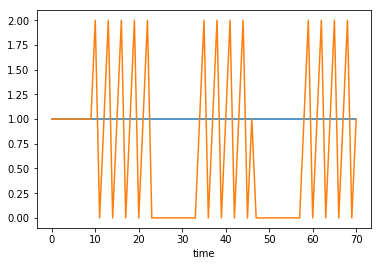

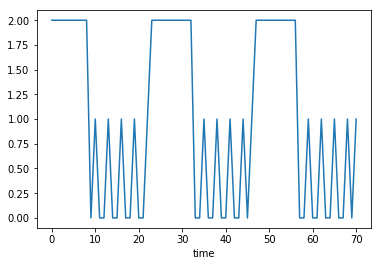

In [12]:
# plot data
t = range(0, T-1)
# stocks of sleep and savings
plt.plot(t, Zhist[0:T-1], label='Z')
plt.plot(t, Bhist[0:T-1], label='B')
plt.xlabel('time')
plt.show()
# chosen activity
plt.plot(t, Ahist[0:T-1], label='A')
plt.xlabel('time')
plt.show()